### Telecom Customer Curn

### Introduction

Here we are using sample data provided by IBM, the dataset contains information about customers who have left the company  within last month (Customer Churn).

The dataset consists of 7043 rows and 33 columns with 31 features, each row contains the information for one consumer while the column contains information about the services subscribed, account and demographic data.

The dataset can be downloaded from here :

https://community.ibm.com/accelerators/catalog/content/Telco-customer-churn

**The dataset includes information about** :

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device 
* protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, and if they have partners and dependents

more information about the data can be found at below link :

https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113
 
 


### Importing the required libraries

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

### Importing the data

In [310]:
df = pd.read_csv('Telco_customer_churn.csv')

In [311]:
pd.set_option('display.max_columns', None)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [312]:
df.shape

(7043, 33)

In [313]:
# most features are categorical except for 3 numerical columns 

summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
summary = summary.reset_index()
summary['Name'] = summary['index']
summary = summary[['Name','dtypes']]
summary['Missing'] = df.isnull().sum().values    
summary['Uniques'] = df.nunique().values
summary

,Name,dtypes,Missing,Uniques
0,CustomerID,object,0,7043
1,Count,int64,0,1
2,Country,object,0,1
3,State,object,0,1
4,City,object,0,1129
5,Zip Code,int64,0,1652
6,Lat Long,object,0,1652
7,Latitude,float64,0,1652
8,Longitude,float64,0,1651
9,Gender,object,0,2


In [314]:
# There are some blank entries in the dataset for column TotalCharges as the tenure is 0 

print(df.loc[df['Total Charges'] == ' '].shape)

# Also there are some blank enties for the column Churn Reason

df.loc[df['Churn Reason'].isnull()].shape

(11, 33)


(5174, 33)

### Cleaning the data

Remove the unnecessary features

The data is clean except for two things first there are some missing values and also the datat type of TotalCharges should be float

In [389]:
# Count is single value 1
# We do not need the feature Country, State as the dataset is for usa and california
# We do not need the feature Zip Code as we are using city for the location data
# We do not need the features Lat Long, Latitude and longitude as we will be using city for this analysis
# We do not use the Churn Score as it is calculated using the predictive tool IBM SPSS Modeler
# Churn value is dummy encoded label

df_new = df.copy()
df_new = df_new.drop(['Count', 'Country', 'State', 'Zip Code', 'Lat Long','Latitude','Longitude', 'Churn Score', 'Churn Value'], axis = 1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   City               7043 non-null   object 
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   Tenure Months      7043 non-null   int64  
 7   Phone Service      7043 non-null   object 
 8   Multiple Lines     7043 non-null   object 
 9   Internet Service   7043 non-null   object 
 10  Online Security    7043 non-null   object 
 11  Online Backup      7043 non-null   object 
 12  Device Protection  7043 non-null   object 
 13  Tech Support       7043 non-null   object 
 14  Streaming TV       7043 non-null   object 
 15  Streaming Movies   7043 non-null   object 
 16  Contract           7043 

In [316]:
# making copy of the actual data and coverting the datatype of the TotalCharges to float
# before converting TotalCharges into float we replace blank values with 0


df_new.loc[df_new['Total Charges'] == ' ', 'Total Charges'] = 0
df_new['Total Charges'] = pd.to_numeric(df_new['Total Charges'])
df_new['Total Charges'].dtype

dtype('float64')

In [317]:
# we can see the TotalCharges is a highly correlated with MonthlyCharges times tenure

monthly_expense_for_given_tenure = df_new['Monthly Charges'] * df_new['Tenure Months']
monthly_expense_for_given_tenure.corr(df_new['Total Charges'])

0.9995605537972277

In [318]:
# imputing the missing values of TotalCharges using (TotalCharges = tenure * MonthlyCharges)

df_new['Total Charges'] = df_new['Tenure Months'] * df_new['Monthly Charges']
df_new[df_new['Tenure Months'] * df_new['Monthly Charges'] != df_new['Total Charges']].shape

(0, 24)

In [368]:
# For those customer who are not churned imputing the value of reason as 'Not Available'

df_new.loc[df_new['Churn Reason'].isnull(), 'Churn Reason'] = 'Not Available'
df_new.loc[df_new['Churn Reason'].isnull()].shape

df_new.loc[df_new['Churn Label'] == 'No'].shape

(5174, 24)

### Exploring the data

In [320]:
# Firstly we will see the distribution of churn in the dataset

print("Customer churn in percentage")
df_new.groupby('Churn Label')['CustomerID'].nunique().transform(lambda x: x/x.sum() * 100)

Customer churn in percentage


Churn Label
No     73.463013
Yes    26.536987
Name: CustomerID, dtype: float64

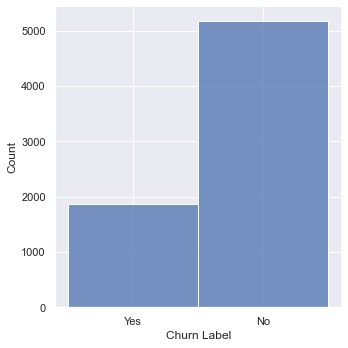

In [321]:
# we can also see using distribution plot that the target variable in the dataset is unbalanced

sns.displot(df_new['Churn Label'])

#### Numerical Features

In [322]:
# There are four numerical features i.e MonthlyCharges, TotalCharges, tenure and CLTV. 
# we are plotting the probability density function against the target feature

<AxesSubplot:title={'center':'KDE Plot for Tenure in months'}, xlabel='Tenure Months', ylabel='Density'>

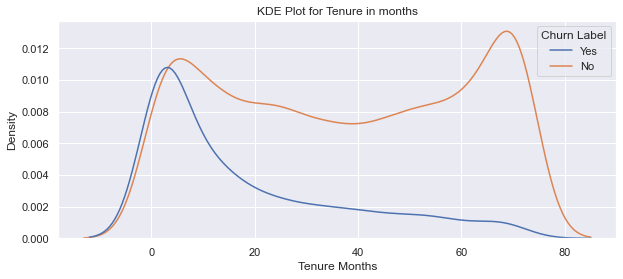

In [323]:
# Visualizing the kernel density estimation of Tenure in months for Churn Label Yes and No

plt.figure(figsize=(10, 4))
plt.title('KDE Plot for Tenure in months')
sns.kdeplot(data=df_new, x="Tenure Months", hue="Churn Label")

In [324]:
# From the above plot we can observe that the customers who have recently joined are more likely to churn

<AxesSubplot:title={'center':'KDE Plot for Monthly Charges'}, xlabel='Monthly Charges', ylabel='Density'>

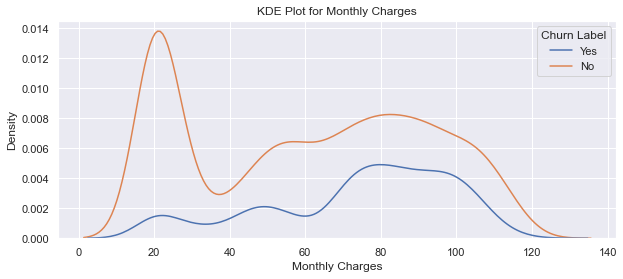

In [325]:
# Visualizing the kernel density estimation of Monthly Charges for Churn Label Yes and No

plt.figure(figsize=(10, 4))
plt.title('KDE Plot for Monthly Charges')
sns.kdeplot(data=df_new, x="Monthly Charges", hue="Churn Label")

In [326]:
# From the above plot we can observe that the customers with higher monthly charges are more likely to churn

<AxesSubplot:title={'center':'KDE Plot for Total Charges'}, xlabel='Total Charges', ylabel='Density'>

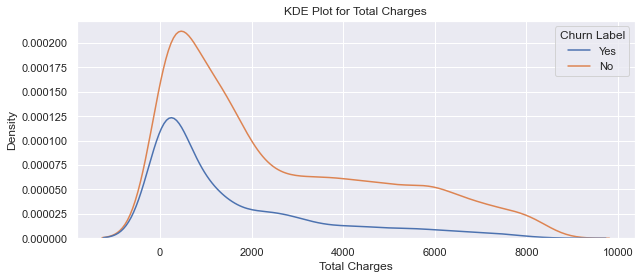

In [327]:
# Visualizing the kernel density estimation of Total Charges for Churn Label Yes and No

plt.figure(figsize=(10, 4))
plt.title('KDE Plot for Total Charges')
sns.kdeplot(data=df_new, x="Total Charges", hue="Churn Label")

In [328]:
# Tenure in months and Monthly Charges are important features

<AxesSubplot:title={'center':'KDE Plot for CLTV'}, xlabel='CLTV', ylabel='Density'>

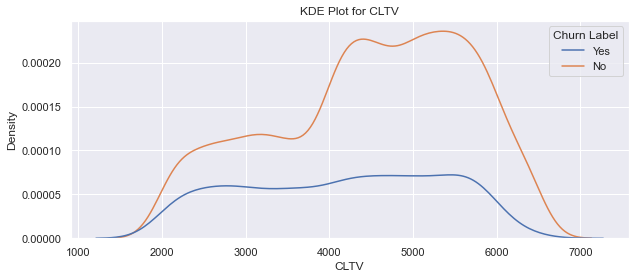

In [329]:
# Visualizing the kernel density estimation of CLTV for Churn Label Yes and No

plt.figure(figsize=(10, 4))
plt.title('KDE Plot for CLTV')
sns.kdeplot(data=df_new, x="CLTV", hue="Churn Label")

In [365]:
# we need to come up with strategies to reduce churn specially with customer with high CLTV

#### Categorical Features

In [387]:
# plotting distribution of customer churn for differnt cities

df_new.loc[df['Churn Label'] == 'Yes'].groupby('City')['Churn Label'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

,City,count
417,Los Angeles,90
638,San Diego,50
641,San Francisco,31
645,San Jose,29
629,Sacramento,26
264,Fresno,16
412,Long Beach,15
509,Oakland,13
277,Glendale,13
713,Stockton,12


In [378]:
# From the above table we can say that the highest churn is recorded in cities Los Angeles and San Diego

In [381]:
# plotting distribution of customer churn for differnt cities

df_new.loc[df['Churn Label'] == 'Yes'].groupby('Churn Reason')['Churn Label'].count().reset_index(name='count').sort_values(['count'], ascending=False)

,Churn Reason,count
1,Attitude of support person,192
4,Competitor offered higher download speeds,189
5,Competitor offered more data,162
7,Don't know,154
3,Competitor made better offer,140
0,Attitude of service provider,135
2,Competitor had better devices,130
14,Network reliability,103
18,Product dissatisfaction,102
17,Price too high,98


In [388]:
# From the above table we can observe that highest churn is due to
# dissatisfaction from support service and the internet speed and data

In [390]:
df_new.head(5)

,CustomerID,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV,Churn Reason
0,3668-QPYBK,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3239,Competitor made better offer
1,9237-HQITU,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2701,Moved
2,9305-CDSKC,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,5372,Moved
3,7892-POOKP,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,5003,Moved
4,0280-XJGEX,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,5340,Competitor had better devices


<Figure size 720x288 with 0 Axes>

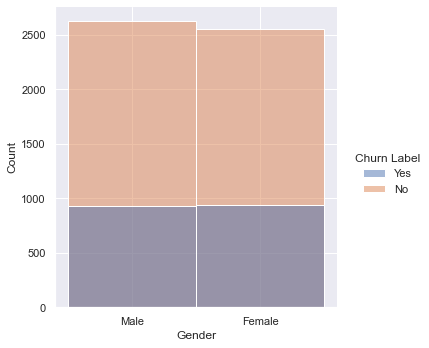

In [391]:
# Visualizing the distribution of Gender for Churn Label Yes and No

plt.figure(figsize=(10, 4))
#plt.title('Distribution of Gender for Churn Label Yes and No')
sns.displot(data=df_new, x="Gender", hue="Churn Label")

In [392]:
# From above figure we can observe that feature Gender alone has no influence on Churn Label

<Figure size 720x288 with 0 Axes>

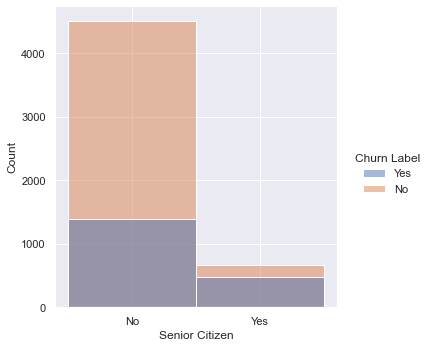

In [393]:
# Similarly the distribution of Senior Citizen for Churn Label Yes and No

plt.figure(figsize=(10, 4))
#plt.title('Distribution of Senior Citizen for Churn Label Yes and No')
sns.displot(data=df_new, x="Senior Citizen", hue="Churn Label")

In [436]:
print('Percentage of senior citizens ' + str((df.loc[df_new['Senior Citizen'] == 'Yes']['CustomerID'].count()/df_new.shape[0])*100))
print('Percentage of churn in senior citizens ' + str((df.loc[(df_new['Senior Citizen'] == 'Yes') & (df_new['Churn Label'] == 'Yes')]['CustomerID'].count()/ df.loc[df_new['Senior Citizen'] == 'Yes']['CustomerID'].count()) * 100))

print('Percentage of churn in non - senior citizens ' + str((df.loc[(df_new['Senior Citizen'] == 'No') & (df_new['Churn Label'] == 'Yes')]['CustomerID'].count()/ df.loc[df_new['Senior Citizen'] == 'No']['CustomerID'].count()) * 100))

Percentage of senior citizens 16.21468124378816
Percentage of churn in senior citizens 41.68126094570928
Percentage of churn in non - senior citizens 23.606168446026096


In [437]:
# Here from the graph and calculations we can observe that even though there are only 16 % senior citizens 
# They have much higher churn of ~ 42% compared to non senior citizens

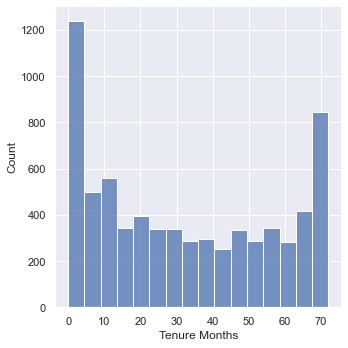

In [332]:
# show the distribution of tenure.
sns.displot(df_new['Tenure Months'])

In [197]:
# It is a bimodal distribution, there are two peaks which means there two extremes
# of customers, we can see what services are used by customer who have kept them for more than 70 months